<h1 style="color:blue; text-align:center;""> Lecture 21 </h1>
<hr style="height:5px;border-width:0;color:blue;background-color:blue">

## Linear Regression with Scikit-Learn

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

### Data Loading

In [2]:
data = pd.read_csv("LR.txt", header=None, names=['Area', 'Price'])
data

,Area,Price
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [3]:
X = data['Area']
Y = data['Price']

In [4]:
print(X.shape)
print(Y.shape)

(100,)
(100,)


In [5]:
type(X)

pandas.core.series.Series

### Data Reshaping

In [6]:
# Data needs to be a numpy array of proper shape before given as input to the model
X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)

print(X.shape)
print(Y.shape)

(100, 1)
(100, 1)


In [7]:
type(X)

numpy.ndarray

In [8]:
# X

### Test-Train Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

### Training

In [16]:
regressor = LinearRegression()

In [17]:
#training the algorithm
regressor.fit(X_train, y_train) 

LinearRegression()

In [18]:
# the best slope
print(regressor.coef_)

[[1.37495924]]


### Testing

In [19]:
y_pred = regressor.predict(X_test)

In [20]:
type(y_pred)

numpy.ndarray

In [21]:
y_pred

array([[83.96125681],
       [75.40724551],
       [89.76407235],
       [80.89247492],
       [66.33820131],
       [68.72803257],
       [66.60541137],
       [64.43383373],
       [75.40712833],
       [73.95178851]])

In [22]:
# .flatten -> to make the array 1D so that it could be included in the pandas dataframe
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,95.455053,83.961257
1,69.588898,75.407246
2,62.562382,89.764072
3,71.139728,80.892475
4,86.642020,66.338201
5,90.123572,68.728033
6,82.892504,66.605411
7,57.812513,64.433834
8,73.434642,75.407128
9,81.536991,73.951789


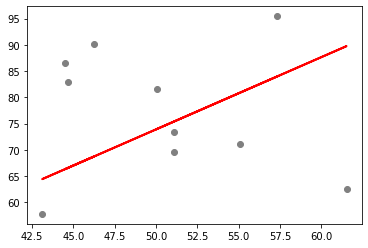

In [23]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 12.843204155949348
Mean Squared Error: 224.15599759367942
Root Mean Squared Error: 14.971840153891552


### Bias Variance Tradeoff

In [25]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso